In [1]:
from collections import defaultdict
from tabulate import tabulate
from timeit import Timer
from collections import OrderedDict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [2]:
def gen_random_graph(size):
    G = nx.gnm_random_graph(size, size*2, None, True)
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(0, 10)
    return G

        
def floyd_warshall(G, weight='weight'):
    dist = defaultdict(lambda: defaultdict(lambda: float('inf')))
    pred = defaultdict(dict)
    
    undirected = not G.is_directed()
    
    for v in G:
        dist[v][v] = 0
    
    for i, j, d in G.edges(data=True):
        w = d.get(weight)
        dist[i][j] = w
        pred[i][j] = i
        if undirected:
            dist[j][i] = w
            pred[j][i] = j
            
    for k in G:
        for i in G:
            for j in G:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    pred[i][j] = pred[k][j]
                    
    return dict(pred), dict(dist)


def reconstruct_path(source, target, predecessors):
    if source == target:
        return []
    
    prev = predecessors[source]
    curr = prev[target]
    path = [target, curr]
    
    while curr != source:
        curr = prev[curr]
        path.append(curr)
        
    return list(reversed(path))


def floyd_warshall_verbose(G):
    predecessors, distances = floyd_warshall(G)

    headers = ['v', 'predecessors']
    data = [(k, OrderedDict(sorted(v.items()))) for k,v in sorted(predecessors.items())]
    print(tabulate(data, headers), "\n")

    headers = ['v', 'distances']
    data = [(k, OrderedDict(dict(v))) for k,v in sorted(distances.items())]
    print(tabulate(data, headers), "\n")

    source = random.randint(0, len(G)/2)
    target = random.randint(0, len(G)-1)
    print("Shortest path from", source, "to", target, "is", reconstruct_path(source, target, predecessors))

In [3]:
G = gen_random_graph(10)

headers = ["i","j","w"]
data = [(i, j, d['weight']) for (i, j, d) in G.edges(data=True)]
print(tabulate(data, headers))

  i    j    w
---  ---  ---
  0    7    6
  0    8    7
  2    7    9
  2    9    9
  2    0   10
  3    6    3
  3    8    9
  3    5    0
  3    9    0
  3    7    1
  4    8    3
  5    8    9
  5    4    4
  6    5    9
  6    9    7
  7    4    1
  7    1    9
  8    2   10
  8    5    9
  9    6    8


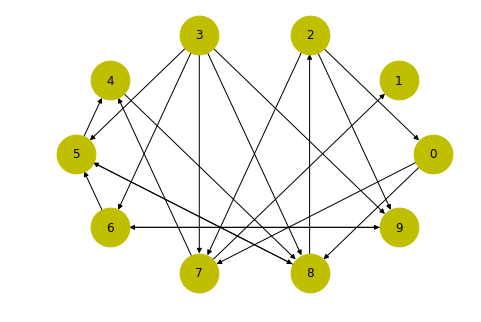

In [4]:
nx.draw_circular(G, with_labels=True, node_size=1500, node_color='y', alpha=1, arrows=True)

In [5]:
floyd_warshall_verbose(G)

  v  predecessors
---  -------------------------------------------------------------------------------------
  0  OrderedDict([(1, 7), (2, 8), (4, 7), (5, 8), (6, 9), (7, 0), (8, 0), (9, 2)])
  2  OrderedDict([(0, 2), (1, 7), (4, 7), (5, 8), (6, 9), (7, 2), (8, 4), (9, 2)])
  3  OrderedDict([(0, 2), (1, 7), (2, 8), (4, 7), (5, 3), (6, 3), (7, 3), (8, 4), (9, 3)])
  4  OrderedDict([(0, 2), (1, 7), (2, 8), (5, 8), (6, 9), (7, 2), (8, 4), (9, 2)])
  5  OrderedDict([(0, 2), (1, 7), (2, 8), (4, 5), (6, 9), (7, 2), (8, 4), (9, 2)])
  6  OrderedDict([(0, 2), (1, 7), (2, 8), (4, 5), (5, 6), (7, 2), (8, 4), (9, 6)])
  7  OrderedDict([(0, 2), (1, 7), (2, 8), (4, 7), (5, 8), (6, 9), (8, 4), (9, 2)])
  8  OrderedDict([(0, 2), (1, 7), (2, 8), (4, 5), (5, 8), (6, 9), (7, 2), (9, 2)])
  9  OrderedDict([(0, 2), (1, 7), (2, 8), (4, 5), (5, 6), (6, 9), (7, 2), (8, 4)]) 

  v  distances
---  ---------------------------------------------------------------------------------------------------------------
  

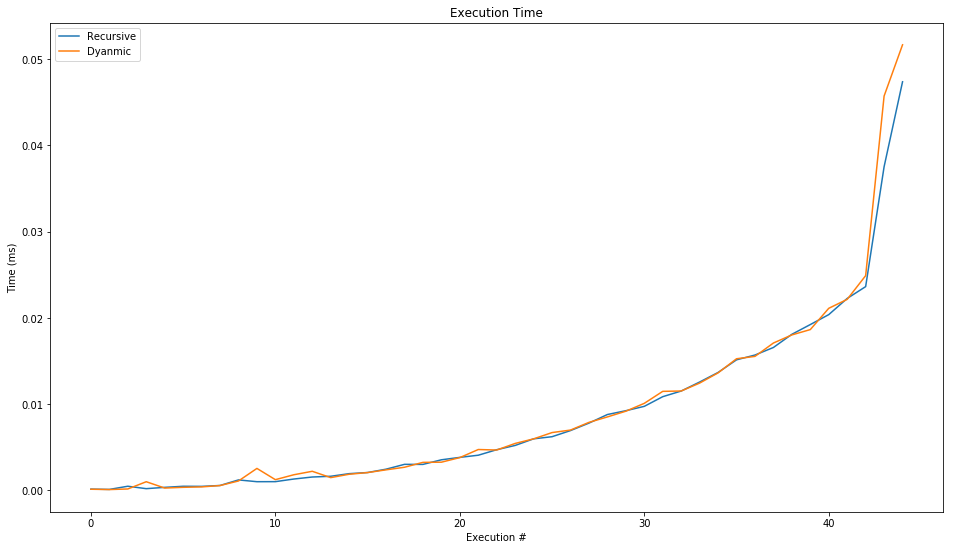

In [6]:
tr = []
tp = []

for i in range(5, 50):
    G = gen_random_graph(i)
    
    rd = Timer(lambda: floyd_warshall(G))
    rt = rd.repeat(repeat=1,number=1)
    tr.append(np.mean(rt))

    rk = Timer(lambda: floyd_warshall(G))
    rt = rk.repeat(repeat=1,number=1)
    tp.append(np.mean(rt))
    
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(tr, label="Recursive")
plt.plot(tp, label="Dyanmic")
plt.legend(loc="upper left")
plt.title("Execution Time")
plt.xlabel("Execution #")
plt.ylabel("Time (ms)")
plt.show()